# 3D Point Clouds

Working with point clouds in native python is a pain, use [Cloud Compare](https://www.danielgm.net/cc/) if you have to work with a weird format resize, convert or reconfigure youre point cloud data.

[Based on Florent Poux's blog](https://towardsdatascience.com/how-to-automate-3d-point-cloud-segmentation-and-clustering-with-python-343c9039e4f5)

[Creating meshes from clouds](https://towardsdatascience.com/5-step-guide-to-generate-3d-meshes-from-point-clouds-with-python-36bad397d8ba)

QGIS is a good tool for viewing what back end stuff is going on visually.

In [9]:
import os
import numpy as np
import laspy as lp
import open3d as o3d
from pathlib import Path

In [10]:
input_path = Path(os.getcwd()).parent / "res"
output_path = Path(os.getcwd()).parent / "res" / "output"
dataname = "0617_Cloud.xyz"

In [8]:
file_path = Path(os.getcwd()).parent / 'res' / "0617.laz"

point_cloud = lp.read(file_path)

In [5]:
points = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose()
colors = np.vstack((point_cloud.red, point_cloud.green, point_cloud.blue)).transpose()

In [6]:
import pptk

v = pptk.viewer(points)
v.attributes(colors / 65535)

preview of resulting image

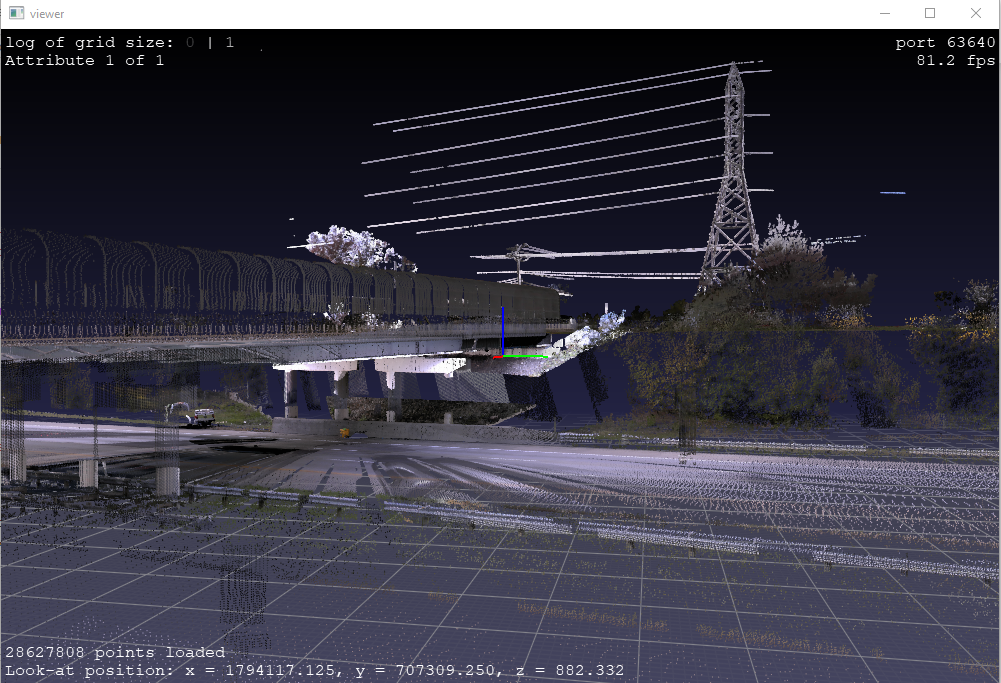

The resulting point cloud has to be refined into usable objects and corrected, some of the tools for visualizing data in various ways are shown.

To make a selection and filter out the data for it (for example a car/truck), go to top view (shortcut `7`) and make a selection by dragging a rectangle selection holding `ctrl` + `LMB`

![selection_demo](https://miro.medium.com/v2/resize:fit:640/1*Hd6oHUq1h4wwS7kvvEI4Rw.gif)

In [ ]:
# To get only the tower from a 3D scan

# 3D Point Cloud Segmentation

[How to automate 3D point cloud Segmentation](https://towardsdatascience.com/how-to-automate-3d-point-cloud-segmentation-and-clustering-with-python-343c9039e4f5)

[Data](https://drive.google.com/file/d/1CJrH9eqzOte3PHJ_g8iLifJFE_cBGg6b/view?usp=sharing)

environment libraries: - not compatible with python 3.10, using 3.7 instead `(python37)`

```bash
conda install numpy
conda install matplotlib
conda install -c open3d-admin open3d
```

In [10]:
import open3d as o3d

In [11]:
# load sample data
pcd = o3d.io.read_point_cloud(r"D:\Jetbrains\PycharmProjects\civilpy\res\sample point cloud\TLS_kitchen.ply")
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=16), fast_normal_computation=True)

In [14]:
plane_model, inliers = pcd.segment_plane(distance_threshold=0.01, ransac_n=3, num_iterations=1000)

In [15]:
inlier_cloud = pcd.select_by_index(inliers)
outlier_cloud = pcd.select_by_index(inliers, invert=True)

In [16]:
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud])

In [17]:
plane_model, inliers = pcd.segment_plane(distance_threshold=0.01, ransac_n=3, num_iterations=1000)

In [18]:
inlier_cloud = pcd.select_by_index(inliers)
outlier_cloud = pcd.select_by_index(inliers, invert=True)

In [19]:
inlier_cloud.paint_uniform_color([1, 0, 0])
outlier_cloud.paint_uniform_color([0.6, 0.6, 0.6])

PointCloud with 380037 points.

In [20]:
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud])

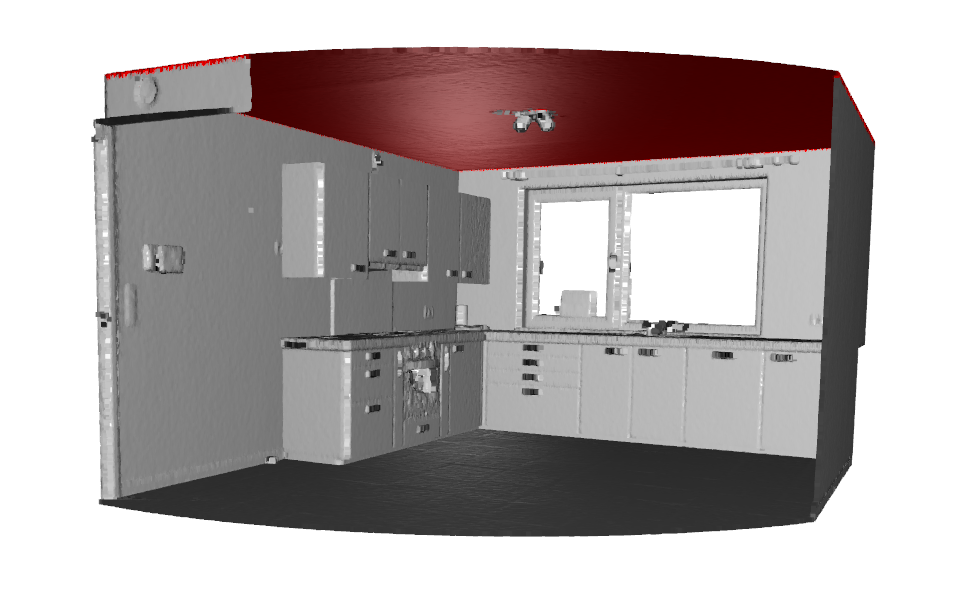

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# load second sample data
pcd = o3d.io.read_point_cloud(r"D:\Jetbrains\PycharmProjects\civilpy\res\sample point cloud\TLS_kitchen_sample.ply")
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=16), fast_normal_computation=True)

In [25]:
labels = np.array(pcd.cluster_dbscan(eps=0.05, min_points=10))

In [26]:
max_label = labels.max()
colors = plt.get_cmap("tab20")(labels / (max_label 
if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd])

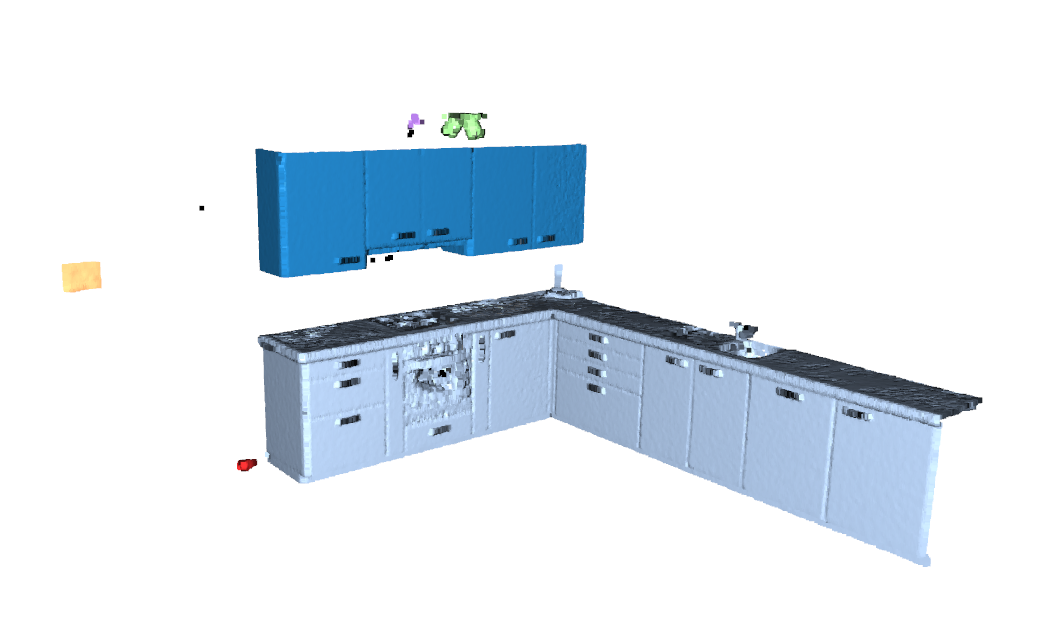

In [27]:
segment_models={}
segments={}
max_plane_idx=20

In [28]:
# Going back to the first data source
pcd = o3d.io.read_point_cloud(r"D:\Jetbrains\PycharmProjects\civilpy\res\sample point cloud\TLS_kitchen.ply")
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=16), fast_normal_computation=True)

In [29]:
rest=pcd
for i in range(max_plane_idx):
    colors = plt.get_cmap("tab20")(i)
    segment_models[i], inliers = rest.segment_plane(
    distance_threshold=0.01,ransac_n=3,num_iterations=1000)
    segments[i]=rest.select_by_index(inliers)
    segments[i].paint_uniform_color(list(colors[:3]))
    rest = rest.select_by_index(inliers, invert=True)
    print("pass",i,"/",max_plane_idx,"done.")

pass 0 / 20 done.
pass 1 / 20 done.
pass 2 / 20 done.
pass 3 / 20 done.
pass 4 / 20 done.
pass 5 / 20 done.
pass 6 / 20 done.
pass 7 / 20 done.
pass 8 / 20 done.
pass 9 / 20 done.
pass 10 / 20 done.
pass 11 / 20 done.
pass 12 / 20 done.
pass 13 / 20 done.
pass 14 / 20 done.
pass 15 / 20 done.
pass 16 / 20 done.
pass 17 / 20 done.
pass 18 / 20 done.
pass 19 / 20 done.


In [30]:
o3d.visualization.draw_geometries([segments[i] for i in range(max_plane_idx)]+[rest])

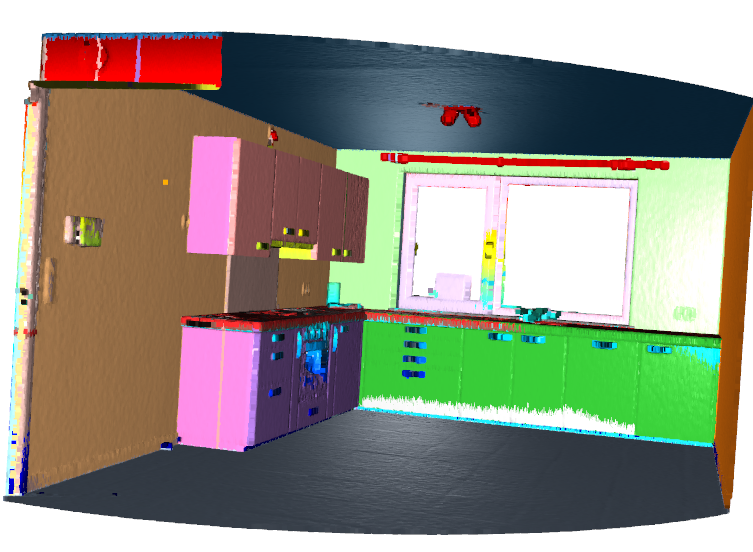

In [31]:
segment_models={}
segments={}
max_plane_idx=20
rest=pcd
d_threshold=0.01

for i in range(max_plane_idx):
    colors = plt.get_cmap("tab20")(i)
    segment_models[i], inliers = rest.segment_plane(distance_threshold=0.01,ransac_n=3,num_iterations=1000)
    segments[i]=rest.select_by_index(inliers)
    labels = np.array(segments[i].cluster_dbscan(eps=d_threshold*10, min_points=10))
    candidates=[len(np.where(labels==j)[0]) for j in np.unique(labels)]
    best_candidate=int(np.unique(labels)[np.where(candidates==np.max(candidates))[0]])
    print("the best candidate is: ", best_candidate)
    rest = rest.select_by_index(inliers, invert=True)+segments[i].select_by_index(list(np.where(labels!=best_candidate)[0]))
    segments[i]=segments[i].select_by_index(list(np.where(labels==best_candidate)[0]))
    segments[i].paint_uniform_color(list(colors[:3]))
    print("pass",i+1,"/",max_plane_idx,"done.")

the best candidate is:  0
pass 1 / 20 done.
the best candidate is:  0
pass 2 / 20 done.
the best candidate is:  0
pass 3 / 20 done.
the best candidate is:  0
pass 4 / 20 done.
the best candidate is:  0
pass 5 / 20 done.
the best candidate is:  0
pass 6 / 20 done.
the best candidate is:  1
pass 7 / 20 done.
the best candidate is:  0
pass 8 / 20 done.
the best candidate is:  0
pass 9 / 20 done.
the best candidate is:  2
pass 10 / 20 done.
the best candidate is:  0
pass 11 / 20 done.
the best candidate is:  0
pass 12 / 20 done.
the best candidate is:  1
pass 13 / 20 done.
the best candidate is:  0
pass 14 / 20 done.
the best candidate is:  2
pass 15 / 20 done.
the best candidate is:  0
pass 16 / 20 done.
the best candidate is:  7
pass 17 / 20 done.
the best candidate is:  0
pass 18 / 20 done.
the best candidate is:  1
pass 19 / 20 done.
the best candidate is:  1
pass 20 / 20 done.


In [32]:
o3d.visualization.draw_geometries([segments[i] for i in range(max_plane_idx)]+[rest])

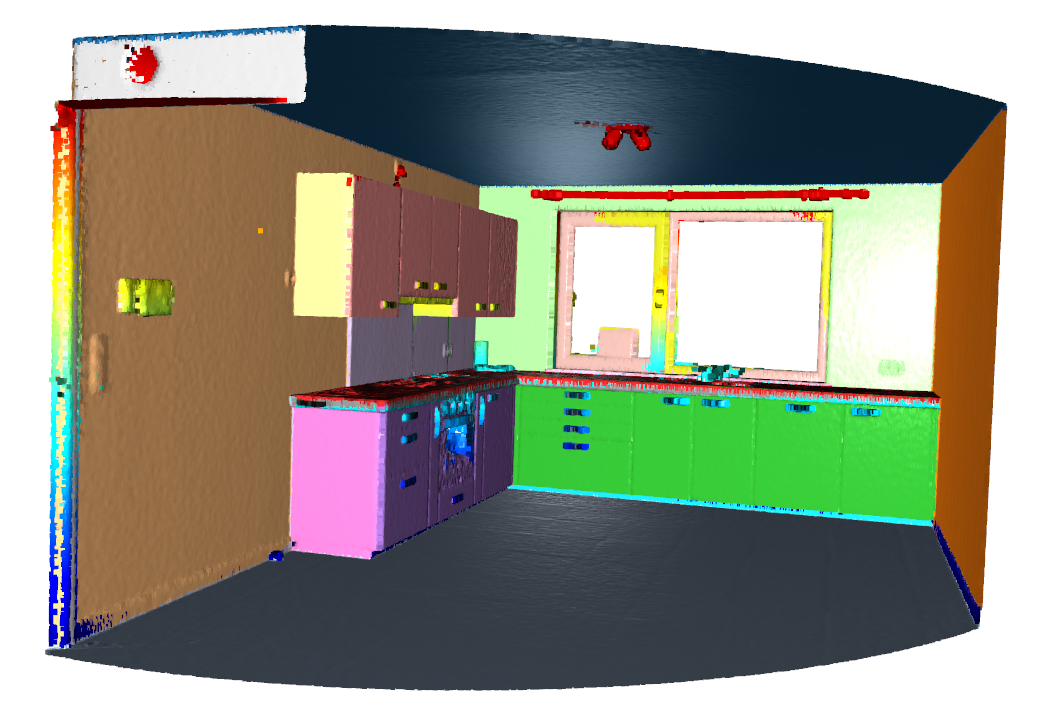

In [33]:
labels = np.array(rest.cluster_dbscan(eps=0.05, min_points=5))
max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")

colors = plt.get_cmap("tab10")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
rest.colors = o3d.utility.Vector3dVector(colors[:, :3])

# o3d.visualization.draw_geometries([segments.values()])
# o3d.visualization.draw_geometries([segments[i] for i in range(max_plane_idx)]+[rest])
o3d.visualization.draw_geometries([segments[i] for i in range(max_plane_idx)]+[rest],zoom=0.3199,front=[0.30159062875123849, 0.94077325609922868, 0.15488309545553303],lookat=[-3.9559999108314514, -0.055000066757202148, -0.27599999308586121],up=[-0.044411423633999815, -0.138726419067636, 0.98753122516983349])
# o3d.visualization.draw_geometries([rest])

point cloud has 96 clusters


In [34]:
o3d.visualization.draw_geometries([segments[i] for i in range(max_plane_idx)]+[rest])

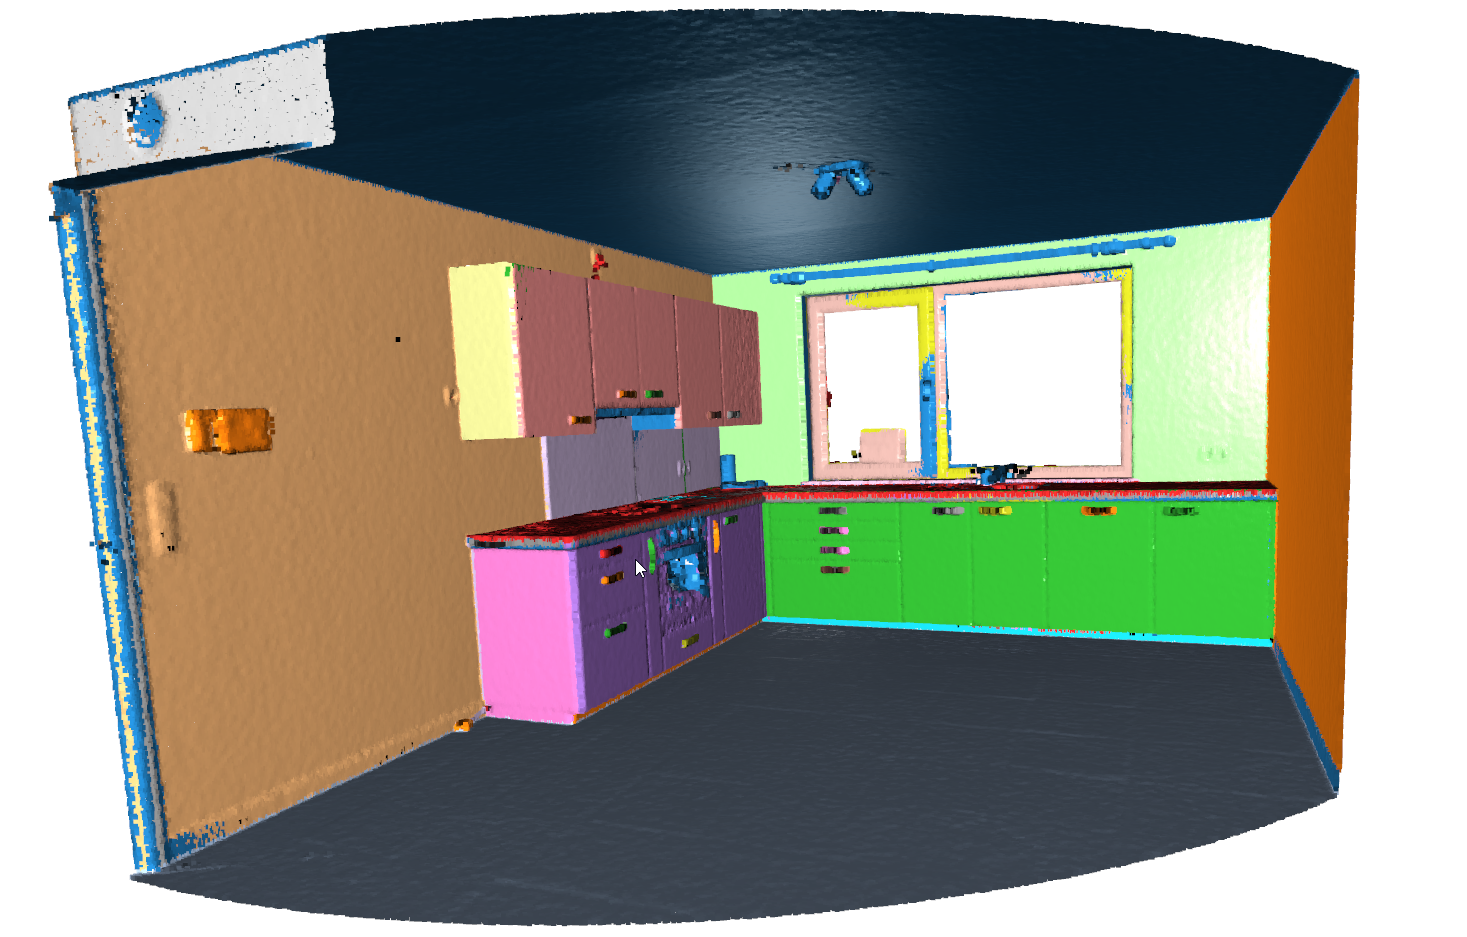

# Clouds to 3D Meshes

[Point Clouds to Meshes](https://towardsdatascience.com/5-step-guide-to-generate-3d-meshes-from-point-clouds-with-python-36bad397d8ba)

In [11]:
import numpy as np
import open3d as o3d

In [12]:
input_path = input_path / 'sample point cloud'
output_path= output_path.parent / "sample point cloud" / "output"
dataname="sample.xyz"
point_cloud= np.loadtxt(input_path / dataname, skiprows=1)

In [13]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(point_cloud[:,:3])
pcd.colors = o3d.utility.Vector3dVector(point_cloud[:,3:6]/255)
pcd.normals = o3d.utility.Vector3dVector(point_cloud[:,3:6])

In [14]:
o3d.visualization.draw_geometries([pcd])

## Strategy 1 - BPA 

In [15]:
distances = pcd.compute_nearest_neighbor_distance()
avg_dist = np.mean(distances)
radius = 3 * avg_dist

In [16]:
bpa_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(pcd,o3d.utility.DoubleVector([radius, radius * 2]))

In [17]:
# //TODO - bpa_mesh was originally undefined `mesh` here
dec_mesh = bpa_mesh.simplify_quadric_decimation(100000)

In [18]:
# draw_geoms_list = [dec_mesh]
draw_geoms_list = [bpa_mesh]
o3d.visualization.draw_geometries(draw_geoms_list)

[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


## Strategy 2 - Poisson's Reconstruction

In [65]:
poisson_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=8, width=0, scale=1.1, linear_fit=False)[0]

In [66]:
bbox = pcd.get_axis_aligned_bounding_box()
p_mesh_crop = poisson_mesh.crop(bbox)

In [67]:
draw_geoms_list = [p_mesh_crop]
o3d.visualization.draw_geometries(draw_geoms_list)

## Writing Outputs to .ply files

In [4]:
o3d.io.write_triangle_mesh(str(output_path / "bpa_mesh.ply"), dec_mesh)
o3d.io.write_triangle_mesh(str(output_path / "p_mesh_c.ply"), p_mesh_crop)

NameError: name 'output_path' is not defined

### Allowing the User to Specify the "Level of Detail" 

Level of detail lets you specify how many triangles make up your outputted model.



In [75]:
def lod_mesh_export(mesh, lods, extension, path):
    mesh_lods={}
    for i in lods:
        mesh_lod = mesh.simplify_quadric_decimation(i)
        o3d.io.write_triangle_mesh(str(path)+"lod_"+str(i)+extension, mesh_lod)
        mesh_lods[i]=mesh_lod
    print("generation of "+str(i)+" LoD successful")
    return mesh_lods

In [76]:
my_lods = lod_mesh_export(bpa_mesh, [100000,50000,10000,1000,100], ".ply", output_path)

generation of 100 LoD successful


In [77]:
my_lods2 = lod_mesh_export(bpa_mesh, [8000,800,300], ".ply", output_path)

generation of 300 LoD successful


In [78]:
o3d.visualization.draw_geometries([my_lods[100000]])

# Visualization of Large Point Clouds

pptk has no support for python 3.8, so the version of python has been bumped back to 3.7 for this notebook

[Article](https://towardsdatascience.com/guide-to-real-time-visualisation-of-massive-3d-point-clouds-in-python-ea6f00241ee0)

In [3]:
dataname="2020_Drone_M"
point_cloud=lp.read(input_path / (dataname + ".las"))

NameError: name 'input_path' is not defined

In [81]:
points = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose()
colors = np.vstack((point_cloud.red, point_cloud.green, point_cloud.blue)).transpose()

In [82]:
# Only keep 1 row for every 10 rows
factor=10
decimated_points_random = points[::factor]

In [85]:
v = pptk.viewer(points)

In [86]:
v.attributes(colors/65535)

# Using Bridge Data

## Conversion from .las to .ply file using cloud compare:

```powershell
PS C:\Program Files\CloudCompare> .\CloudCompare -O "J:\Users\dane.parks\3D Point Clouds\Shenandoah Rail Trail\NarrowPassage_RRBridge_USF.las" -C_EXPORT_FMT PLY -SAVE_CLOUDS
PS C:\Program Files\CloudCompare> .\CloudCompare -O "J:\Users\dane.parks\3D Point Clouds\Shenandoah Rail Trail\SouthForkShenandoah_RRBridge_USF.las" -C_EXPORT_FMT PLY -SAVE_CLOUDS
```

## Using Laspy/PPTK to Visualize Large Point Clouds

The sample data for this, a large truss bridge doesn't actually run very well due to it's size if you try to load all points, for that reson it currently gets decimated by a factor of 10 (1 row for every 10)

In [1]:
point_cloud=lp.read(r"J:\Data\Projects\Users\dane.parks\3D Point Clouds\Shenandoah Rail Trail\SouthForkShenandoah_RRBridge_USF.las")

NameError: name 'lp' is not defined

In [3]:
points = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose()
colors = np.vstack((point_cloud.red, point_cloud.green, point_cloud.blue)).transpose()

In [4]:
v = pptk.viewer(decimated_points_random)

NameError: name 'pptk' is not defined

In [ ]:
v.attributes(decimated_colors_random/65535)

Using a combination of `LMB` and `CTRL` you can select a specific area of the structure:

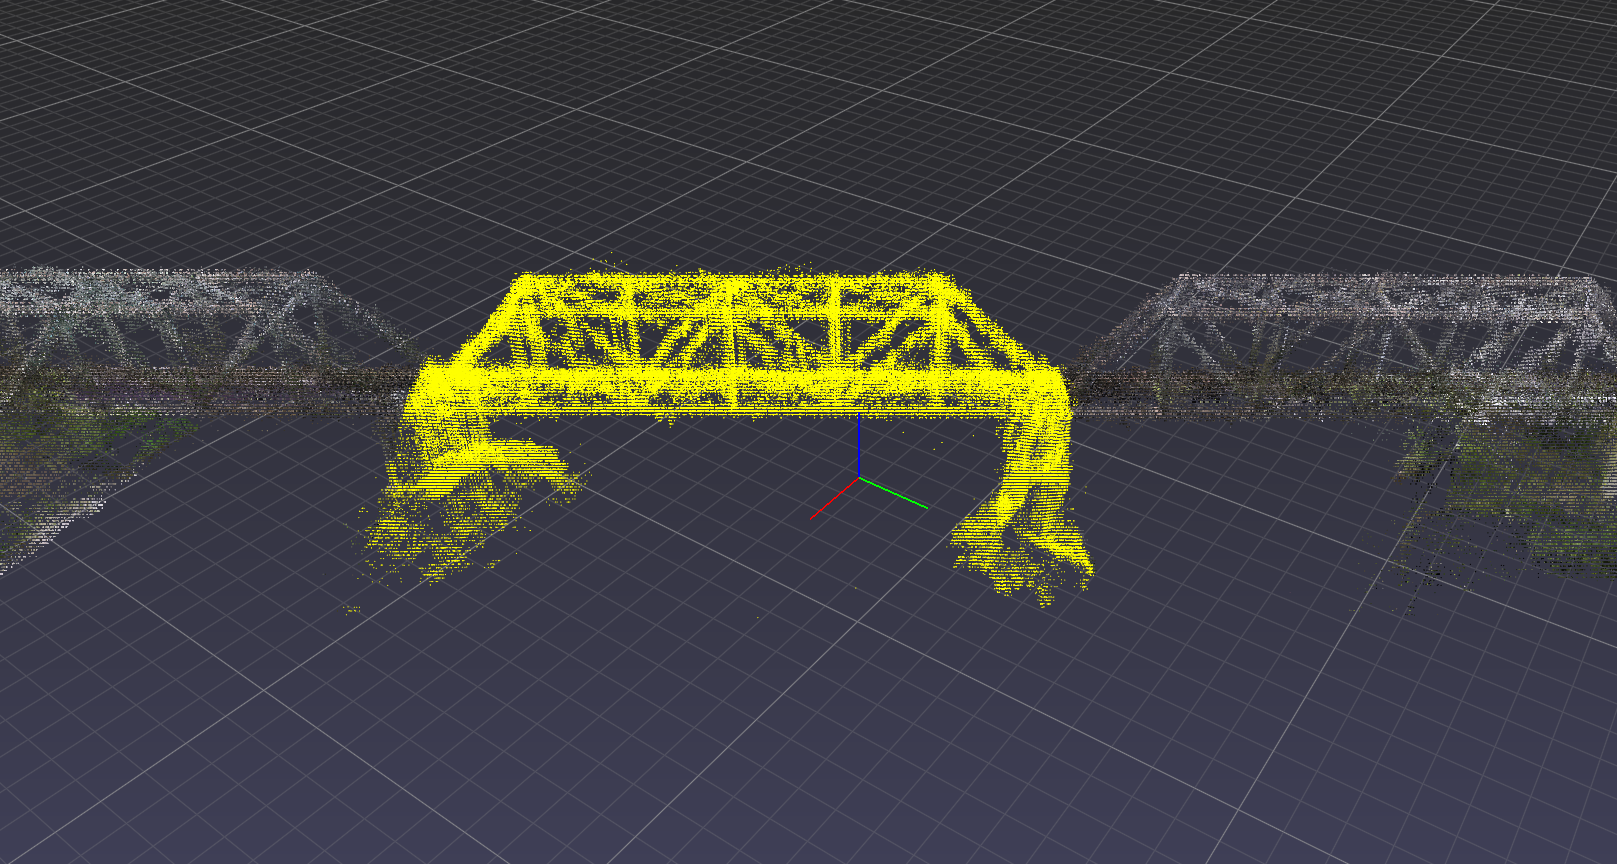

and then interact with it programatically;pcd.points = o3d.utility.Vector3dVector(xyz)
    o3d.io.write_point_cloud("../../TestData/sync.ply", pcd)

In [ ]:
span_2 = v.get('selected')

In [123]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(decimated_points_random[span_2])
pcd.normals = o3d.utility.Vector3dVector(decimated_points_random[span_2])

In [124]:
distances = pcd.compute_nearest_neighbor_distance()
avg_dist = np.mean(distances)
radius = 3 * avg_dist

In [ ]:
bpa_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(pcd, o3d.utility.DoubleVector([radius, radius * 2]))

In [ ]:
dec_mesh = bpa_mesh.simplify_quadric_decimation(100000)

In [ ]:
draw_geoms_list = [dec_mesh]
o3d.visualization.draw_geometries(draw_geoms_list)

Compute Normals for selection

In [100]:
normals=pptk.estimate_normals(points[span_2],k=6,r=np.inf)

In [107]:
idx_normals=np.where(abs(normals[...,2])<0.9)

## Using Open3D

In [54]:
pcd = o3d.io.read_point_cloud(r"J:\Data\Projects\Users\dane.parks\3D Point Clouds\Shenandoah Rail Trail\SouthForkShenandoah_RRBridge_USF_2024-11-14_09h14_48_133.ply")

[Open3D WARNING] Read PLY failed: unable to read file: J:\Data\Projects\Users\dane.parks\3D Point Clouds\Shenandoah Rail Trail\SouthForkShenandoah_RRBridge_USF_2024-11-14_09h14_48_133.ply


In [ ]:
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=16), fast_normal_computation=True)

In [ ]:
rest=pcd
for i in range(max_plane_idx):
    colors = plt.get_cmap("tab20")(i)
    segment_models[i], inliers = rest.segment_plane(
    distance_threshold=0.01,ransac_n=3,num_iterations=1000)
    segments[i]=rest.select_by_index(inliers)
    segments[i].paint_uniform_color(list(colors[:3]))
    rest = rest.select_by_index(inliers, invert=True)
    print("pass",i,"/",max_plane_idx,"done.")

In [ ]:
o3d.visualization.draw_geometries([segments[i] for i in range(max_plane_idx)]+[rest])

Very slow, but kinda works... doesn't recognize surfaces very well.

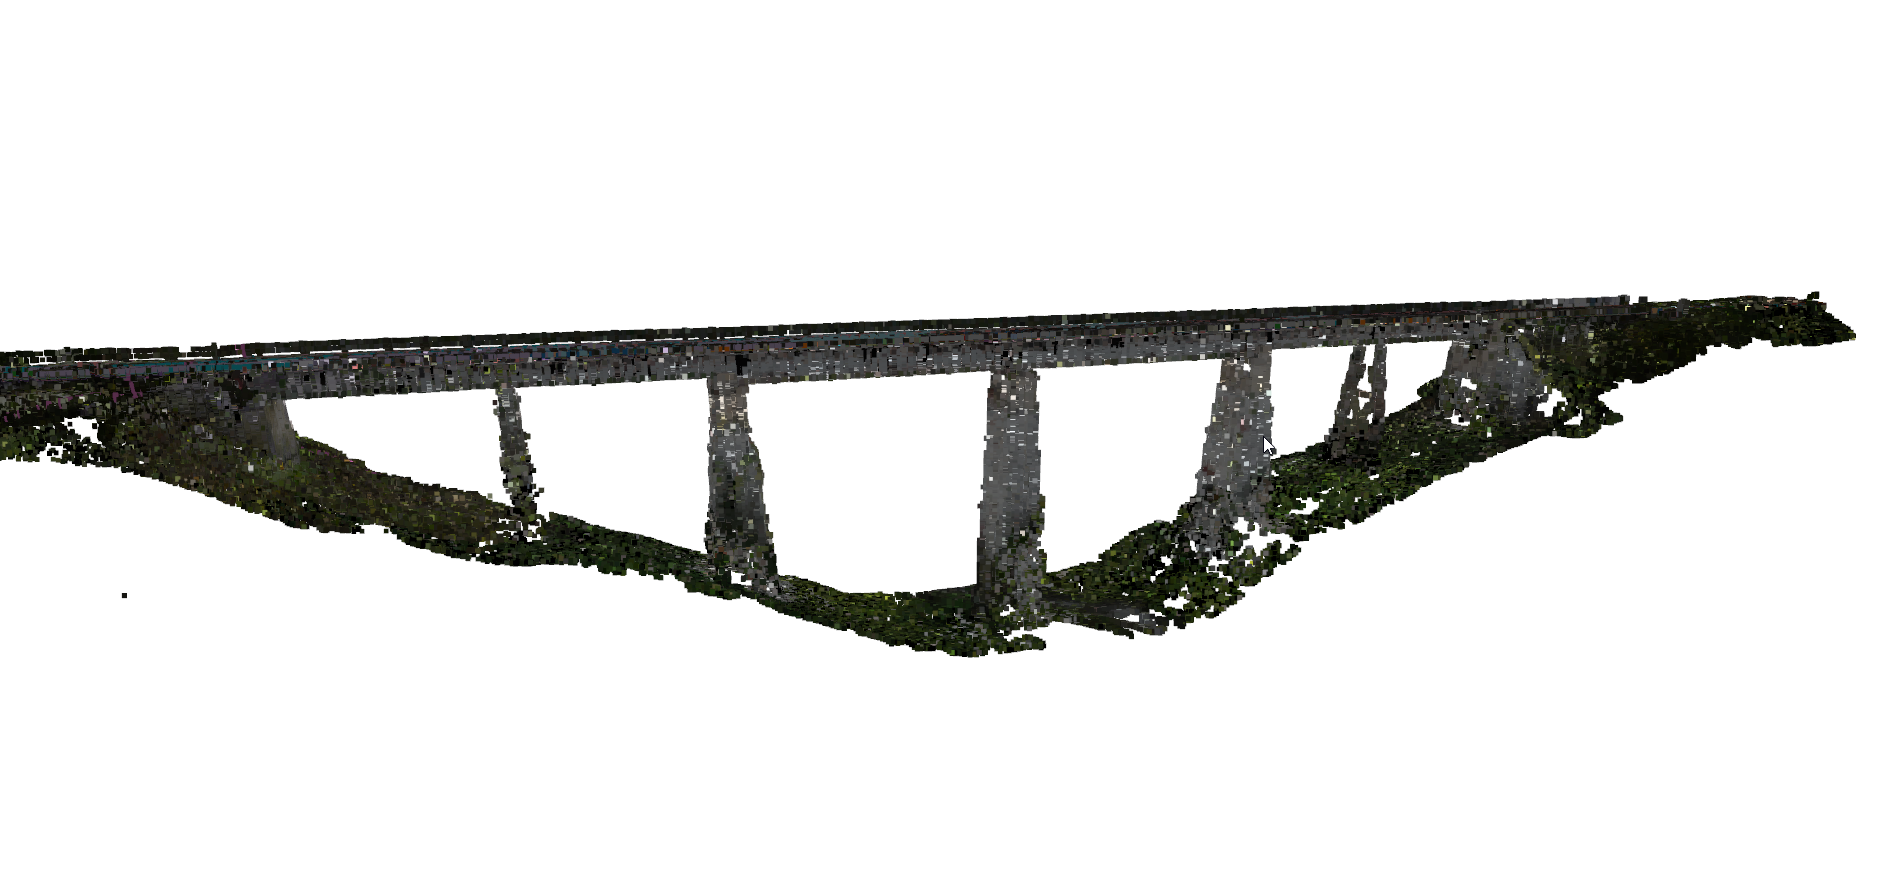

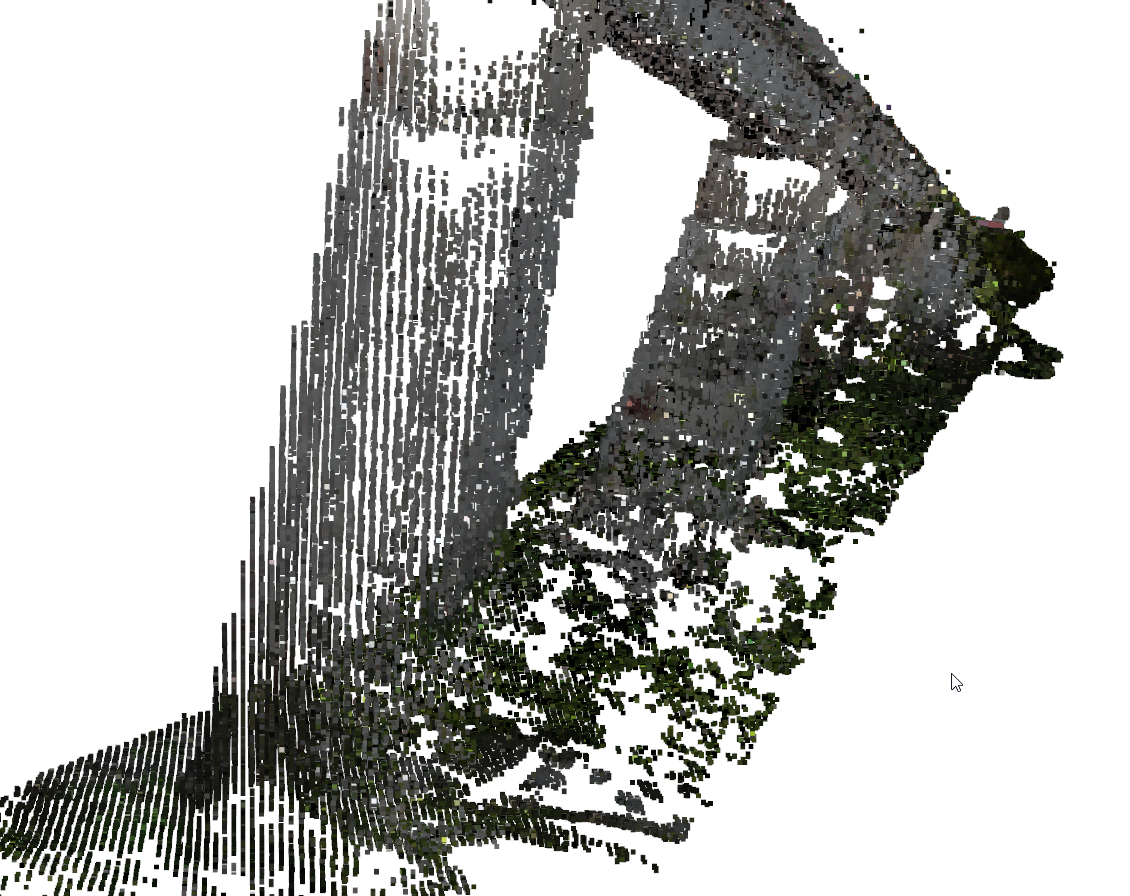

Reading Pointcloud as an xyz file;

In [15]:
dataname=r"J:\Data\Projects\Users\dane.parks\3D Point Clouds\Shenandoah Rail Trail\SouthForkShenandoah_RRBridge_USF.xyz"
point_cloud= np.loadtxt(dataname,skiprows=1)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(point_cloud[:,:3])
pcd.colors = o3d.utility.Vector3dVector(point_cloud[:,3:6]/255)
pcd.normals = o3d.utility.Vector3dVector(point_cloud[:,6:9])

KeyboardInterrupt: 

In [ ]:
o3d.visualization.draw_geometries([pcd])

# 4th Test

None of these have been working very well, taking a 4th stab at it.

# 5

In [1]:
import numpy as np
import open3d as o3d

# Step 1: Load the Point Cloud
xyz_points = np.loadtxt("res/PointClouds/3519-01 Scan - Trimmed.xyz")  # Replace with your .xyz file path
xyz_points = xyz_points[:, :3]  # Ignore additional columns if they exist beyond x, y, z

# Create Open3D PointCloud Object
point_cloud = o3d.geometry.PointCloud()
point_cloud.points = o3d.utility.Vector3dVector(xyz_points)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
# Step 2: Preprocess Point Cloud
# (a) Downsample the point cloud for uniform density
voxel_size = 0.02  # Adjust voxel size for desired density
point_cloud = point_cloud.voxel_down_sample(voxel_size=0.03)  # Adjust the voxel size as needed

# (b) Remove noise and outliers
point_cloud, ind = point_cloud.remove_statistical_outlier(nb_neighbors=20, std_ratio=2.0)  # Tune parameters as needed
print(f"Remaining points after removing outliers: {len(point_cloud.points)}")

# (c) Estimate normals (required for Poisson reconstruction)
# Radius search defines neighbors used to calculate normals; smaller radius → finer normals
point_cloud.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.05, max_nn=30))
point_cloud.orient_normals_consistent_tangent_plane(100)  # Adjust parameter for globally consistent normals

# Visualize the Preprocessed Point Cloud
o3d.visualization.draw_geometries([point_cloud], window_name="Preprocessed Point Cloud", point_show_normal=True)

Remaining points after removing outliers: 424207


In [4]:
# Step 3: Apply Poisson Surface Reconstruction
# The depth parameter controls resolution; higher = finer details but higher computation time
poisson_mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(
    point_cloud, depth=9  # Increase depth for finer meshes, e.g., 10 or 11 (default: 9)
)

In [5]:
# Step 4: Crop the Mesh to Remove Unwanted Artifacts
# Create a bounding box around the original point cloud
bbox = point_cloud.get_axis_aligned_bounding_box()
cropped_mesh = poisson_mesh.crop(bbox)  # Crop the mesh based on point cloud's bounding box

In [6]:
# Step 5: Clean up the Mesh
cropped_mesh.remove_unreferenced_vertices()  # Clean up unused vertices
cropped_mesh.compute_vertex_normals()  # Recalculate vertex normals for visualization/rendering

# Visualize the Final Mesh
o3d.visualization.draw_geometries([cropped_mesh], window_name="Final Mesh")

In [ ]:
# Step 6: Save the Mesh to a File
output_path = "output/output_poisson_mesh.obj"  # Modify to your desired path and filename
o3d.io.write_triangle_mesh(output_path, cropped_mesh)
print(f"Mesh saved to {output_path}")

### Attempt # 5

In [1]:
import numpy as np
import pyvista as pv
from scipy.spatial import Delaunay

In [2]:
# Step 1: Load the Point Cloud
xyz_points = np.loadtxt("res/PointClouds/3519-01 Scan - Trimmed.xyz")[:, :3]

In [3]:
# Step 2: Preprocess the Point Cloud
# Remove duplicates and normalize the point cloud
unique_points = np.unique(xyz_points, axis=0)
min_bound = unique_points.min(axis=0)
max_bound = unique_points.max(axis=0)
scaled_points = (unique_points - min_bound) / (max_bound - min_bound)

# Keep only relevant points if needed (e.g., if tunnel edges are noisy)
# For simplicity, we skip this

In [4]:
# Step 3: Create Alpha Shape
# Use PyVista for alpha shapes
point_cloud = pv.PolyData(scaled_points)
alpha = 0.1  # Adjust alpha to fit the tunnel structure (smaller is tighter)
surface_mesh = point_cloud.delaunay_3d(alpha=alpha).extract_surface()

Tunnel mesh saved at output/alpha_tunnel_mesh.obj


C:\Users\dane.parks\PycharmProjects\civilpy\.venv\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


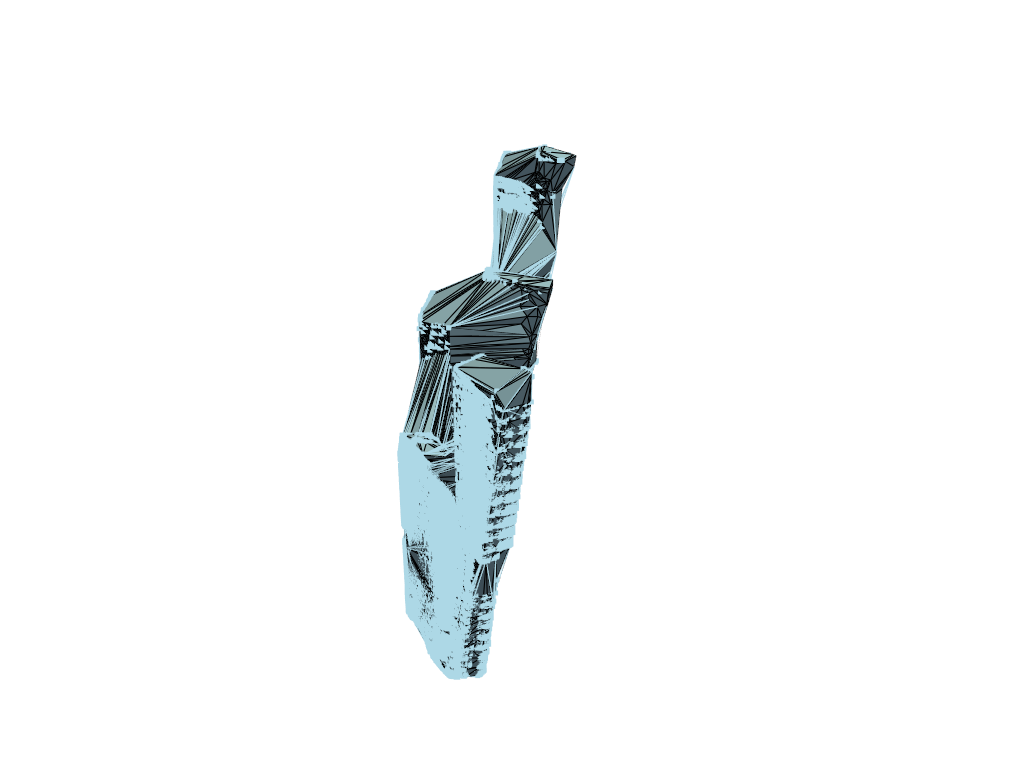

In [5]:
# Step 4: Save and Visualize
output_path = "output/alpha_tunnel_mesh.obj"
surface_mesh.save(output_path)
print(f"Tunnel mesh saved at {output_path}")

# Visualize the surface
plotter = pv.Plotter()
plotter.add_mesh(surface_mesh, color="lightblue", show_edges=True)
plotter.show()

In [1]:
import numpy as np
import pyvista as pv
from scipy.spatial import Delaunay

# Step 1: Load the Point Cloud
xyz_points = np.loadtxt("res/PointClouds/3519-01 Scan - Trimmed.xyz")[:, :3]
point_cloud = pv.PolyData(xyz_points)

In [2]:
# Step 2: Slice the Point Cloud into Sections
num_slices = 10  # Adjust based on complexity (more slices = finer representation)
sliced_clouds = []
bounds = point_cloud.bounds

z_min, z_max = bounds[4], bounds[5]
z_step = (z_max - z_min) / num_slices

for i in range(num_slices):
    slice_start = z_min + i * z_step
    slice_end = slice_start + z_step
    sliced_cloud = point_cloud.clip_box(bounds=[*bounds[:4], slice_start, slice_end], invert=False)
    if sliced_cloud.n_points > 10:  # Avoid empty slices
        sliced_clouds.append(sliced_cloud)

In [3]:
# Step 3: Reconstruct Each Section with Alpha Shapes
alpha = 0.1  # Use Alpha-Shapes for smaller geometry sections
surface_meshes = [cloud.delaunay_3d(alpha=alpha).extract_surface() for cloud in sliced_clouds]

In [4]:
# Step 4: Merge Sections into One Mesh
merged_mesh = pv.MultiBlock(surface_meshes).combine()

In [5]:
# Step 5: Save and Visualize
output_path = "output/sliced_tunnel_mesh.obj"
surface_mesh = merged_mesh.extract_surface()
surface_mesh.save(output_path)
print(f"Tunnel mesh saved at {output_path}")

Tunnel mesh saved at output/sliced_tunnel_mesh.obj


In [7]:
import pyvista as pv
plotter = pv.Plotter()
plotter.add_mesh(surface_mesh, color="lightblue", show_edges=True)
plotter.show()

Widget(value='<iframe src="http://localhost:64265/index.html?ui=P_0x236d8f7ff20_1&reconnect=auto" class="pyvis…

In [12]:
import pyvista as pv

surface_mesh = pv.read("output/sliced_tunnel_mesh.obj")  # Replace with your file path

filled_mesh = surface_mesh.fill_holes(1000000.0)

# Save the repaired mesh
output_path = "output/sliced_tunnel_mesh-filled.obj"
filled_mesh.save(output_path)

In [13]:
import pyvista as pv
plotter = pv.Plotter()
plotter.add_mesh(filled_mesh, color="lightblue", show_edges=True)
plotter.show()

Widget(value='<iframe src="http://localhost:64265/index.html?ui=P_0x236d9b7cb90_3&reconnect=auto" class="pyvis…

## Starting with a LAS file

In [1]:
import laspy
import numpy as np
import pyvista as pv

# Step 1: Load point cloud data from .las file
las_file_path = "res/PointClouds/3519-01 Scan.las"  # Replace with the correct path
with laspy.open(las_file_path) as file:
    point_cloud = file.read()

# Extract XYZ points from the .las file
xyz = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose()

# Step 2: Visualize the point cloud with PyVista
cloud = pv.PolyData(xyz)
cloud.plot(render_points_as_spheres=True, point_size=5)

Widget(value='<iframe src="http://localhost:56840/index.html?ui=P_0x1a6dd26e300_0&reconnect=auto" class="pyvis…

In [2]:
import open3d as o3d

# Convert the point cloud into Open3D format
o3d_cloud = o3d.geometry.PointCloud()
o3d_cloud.points = o3d.utility.Vector3dVector(xyz)

# Step 1: Downsample the point cloud (optional)
downsampled_cloud = o3d_cloud.voxel_down_sample(voxel_size=0.1)

# Step 2: Remove outliers (optional)
cl, ind = downsampled_cloud.remove_statistical_outlier(nb_neighbors=20, std_ratio=2.0)
filtered_cloud = downsampled_cloud.select_by_index(ind)

# Step 3: Convert back to NumPy array if needed
filtered_xyz = np.asarray(filtered_cloud.points)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [ ]:
# Step 1: Convert the filtered point cloud to a PyVista PolyData object
cloud = pv.PolyData(filtered_xyz)

# Step 2: Use Delaunay 3D or 2D for triangulation
mesh = cloud.delaunay_3d()  # For a volumetric reconstruction
surface_mesh = mesh.extract_surface()  # Extract the surface

# Plot the initial mesh
surface_mesh.plot(color="lightblue", show_edges=True)

In [ ]:
# Fill holes in the surface mesh
filled_mesh = surface_mesh.fill_holes(1000.0)  # Adjust the max hole size threshold

# Save the repaired mesh
output_path = "path/to/repaired_mesh.obj"
filled_mesh.save(output_path)

# Visualize the filled/repaired mesh
filled_mesh.plot(color="lightgreen", show_edges=True)

In [ ]:
filled_mesh = filled_mesh.smooth(n_iter=30, relaxation_factor=0.1)

In [ ]:
boundaries = filled_mesh.extract_feature_edges(boundary_edges=True, feature_edges=False)
print(f"Number of open boundaries: {boundaries.n_cells}")

In [ ]:
# Poisson reconstruction
o3d_mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(filtered_cloud, depth=8)

# Visualize the result
o3d.visualization.draw_geometries([o3d_mesh])